In [1]:
import numpy as np
from math import sin, cos, pi
from random import randint, uniform
import matplotlib.pyplot as plt

In [2]:
f1 = lambda x: sin(-3*x**2 + 10*x - 5)
f2 = lambda x: sin(2*x**2 - 6*x + 3)
fr = lambda x: sin(2*x**2 - 6*x - pi) / 2
x1 = np.arange(0.5,4,step=0.01)
x2 = np.arange(0,5,step=0.02)

## Линейная сеть

In [3]:
class Linear:
    def __init__(self, D):
        self.w = [uniform(-5,5) for i in range(D)]
        self.b = uniform(-5,5)
        self.D = D
        
    def predict(self, data, D=None):
        assert len(data) >= self.D, 'len of data incorrect'
        return sum([self.w[i] * data[i] for i in range(self.D)]) + self.b
    
    def fitp(self, data):
        assert len(data) >= self.D, 'len of data incorrect'
        for i in range(self.D, len(data)-1):
            return [self.predict(data[i - self.D:i]) for i in range(self.D, len(data)-1)]
        
    def fit(self, data, epoc=50, lr=0.01):
        hist = []
        for ep in range(epoc):
            h = []
            for i in range(self.D, len(data)-1):
                y = self.predict(data[i - self.D:i])
                t = data[i+1]
                h.append(abs(y - t))
                for j in range(self.D):
                    self.w[j] = self.w[j] - lr * (y - t) * data[i - self.D + j]
            hist.append(sum(h)**0.5)
        return hist
    
    def linearappend(self, data, N):
        data = self.fitp(data)
        for i in range(N):
            data.append(self.predict(data[-1 - self.D:-1]))
        return data

In [4]:
model = Linear(7)

In [5]:
hist = model.fit([f1(x) for x in x1])

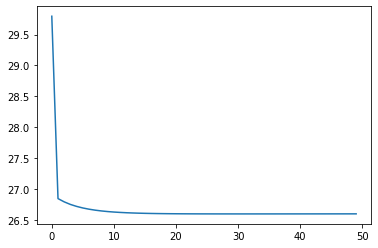

In [6]:
plt.plot(hist)

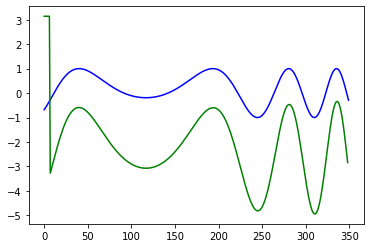

In [7]:
plt.plot([f1(x) for x in x1],'b')
plt.plot([pi]*model.D + model.fitp([f1(x) for x in x1]),'g')

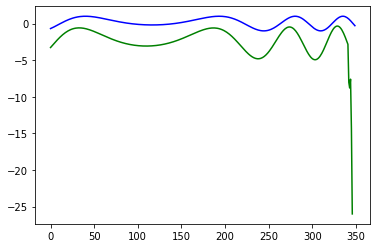

In [8]:
plt.plot([f1(x) for x in x1],'b')
plt.plot(model.linearappend([f1(x) for x in x1], 5),'g')

## Прогноз на N вперед

In [9]:
class LinearN:
    def __init__(self, D, outp):
        self.w = [[uniform(-5,5) for i in range(D)] for j in range(outp)]
        self.b = [uniform(-5,5) for j in range(outp)]
        self.D = D
        self.outp = outp
        
    def predict(self, data, D=None):
        assert len(data) >= self.D, 'len of data incorrect'
        return [sum([self.w[j][i] * data[i] for i in range(self.D)]) + self.b[j] for j in range(self.outp)]
    
    def fitp(self, data):
        assert len(data) >= self.D, 'len of data incorrect'
        for i in range(self.D, len(data)-1):
            return [self.predict(data[i - self.D:i])[0] for i in range(self.D, len(data)-1)]
        
    def fit(self, data, epoc=600, lr=0.01):
        hist = []
        for ep in range(epoc):
            h = []
            for i in range(self.D, len(data)-1-self.outp):
                y = self.predict(data[i - self.D:i])
                t = data[i + 1:i + 1 + self.outp]
                assert len(y) == len(t)
                h.append(sum([y[k] - t[k] for k in range(self.outp)]))
                for n in range(self.outp):
                    for j in range(self.D):
                        self.w[n][j] = self.w[n][j] - lr * (y[n] - t[n]) * data[i - self.D + j]
            hist.append(sum(h)**0.5)
            if abs(hist[-1]) < 10**-6:
                print(f"epoc = {ep}, exit by err")
                return hist
        return hist

In [10]:
model = LinearN(3,2)
hist = model.fit([f1(x) for x in x1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


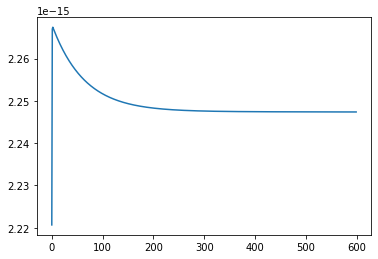

In [11]:
plt.plot(hist)

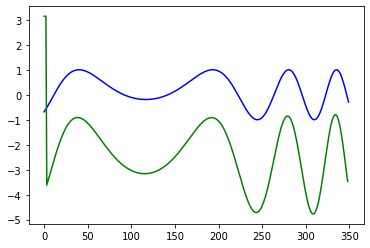

In [12]:
plt.plot([f1(x) for x in x1],'b')
plt.plot([pi]*model.D + model.fitp([f1(x) for x in x1]),'g')